In [ ]:
import pandas as pd

In [ ]:
sonar_issues = pd.read_csv('/content/drive/MyDrive/TAED2/new_sonar_measures.csv')
sonar_issues.head()


#separate the variable ncloc_language_distribution into three colum



,project_id,analysis_key,complexity,file_complexity,duplicated_lines,duplicated_blocks,duplicated_files,duplicated_lines_density,violations,blocker_violations,critical_violations,major_violations,minor_violations,info_violations,open_issues,missing_package_info,development_cost,sqale_debt_ratio,new_sqale_debt_ratio,code_smells,bugs,reliability_remediation_effort,reliability_rating,vulnerabilities,security_remediation_effort,security_rating,lines,ncloc,ncloc_language_distribution,classes,files,directories,functions,statements,comment_lines,comment_lines_density
0,org.apache:cayenne,AWedEXD3C4KKKThcCqHV,30703.0,11.5,19476,1565,408,5.6,16006,103,560,7432,7314,597,16006,204,6207000,3.6,2.401406,14277,1606,14092,5,123,1995,4,347513.0,206900.0,"css=236,java=172713,web=16138,xml=17813",2793.0,2899.0,475.0,16830.0,77095.0,25329.0,10.9
1,org.apache:cayenne,AWedCu_QC4KKKThcCqGv,30703.0,11.5,19476,1565,408,5.6,16006,103,560,7432,7314,597,16006,204,6207000,3.6,2.396168,14277,1606,14092,5,123,1995,4,347513.0,206900.0,"css=236,java=172713,web=16138,xml=17813",2793.0,2899.0,475.0,16830.0,77095.0,25329.0,10.9
2,org.apache:cayenne,AWedBDbIC4KKKThcCqGA,30703.0,11.5,19516,1567,409,5.6,16004,103,560,7431,7315,595,16004,204,6207330,3.6,2.401742,14275,1606,14092,5,123,1995,4,347522.0,206911.0,"css=236,java=172724,web=16138,xml=17813",2793.0,2899.0,475.0,16830.0,77101.0,25329.0,10.9
3,org.apache:cayenne,AWec_b8nC4KKKThcCqFg,30699.0,11.5,19516,1567,409,5.6,16000,103,560,7429,7313,595,16000,204,6206280,3.6,2.399874,14271,1606,14092,5,123,1995,4,347471.0,206876.0,"css=236,java=172689,web=16138,xml=17813",2793.0,2899.0,475.0,16828.0,77085.0,25329.0,10.9
4,org.apache:cayenne,AWec904qC4KKKThcCqE3,30670.0,11.5,19462,1564,408,5.6,15991,103,560,7426,7309,593,15991,204,6200220,3.6,2.387834,14262,1606,14092,5,123,1995,4,347152.0,206674.0,"css=236,java=172487,web=16138,xml=17813",2791.0,2897.0,475.0,16815.0,76996.0,25316.0,10.9


In [ ]:
sonar_num = sonar_issues.iloc[:,2:36]
sonar_num = sonar_num.drop("ncloc_language_distribution", axis =1)
sonar_num

,complexity,file_complexity,duplicated_lines,duplicated_blocks,duplicated_files,duplicated_lines_density,violations,blocker_violations,critical_violations,major_violations,minor_violations,info_violations,open_issues,missing_package_info,development_cost,sqale_debt_ratio,new_sqale_debt_ratio,code_smells,bugs,reliability_remediation_effort,reliability_rating,vulnerabilities,security_remediation_effort,security_rating,lines,ncloc,classes,files,directories,functions,statements,comment_lines,comment_lines_density
0,30703.0,11.5,19476,1565,408,5.6,16006,103,560,7432,7314,597,16006,204,6207000,3.6,2.401406,14277,1606,14092,5,123,1995,4,347513.0,206900.0,2793.0,2899.0,475.0,16830.0,77095.0,25329.0,10.9
1,30703.0,11.5,19476,1565,408,5.6,16006,103,560,7432,7314,597,16006,204,6207000,3.6,2.396168,14277,1606,14092,5,123,1995,4,347513.0,206900.0,2793.0,2899.0,475.0,16830.0,77095.0,25329.0,10.9
2,30703.0,11.5,19516,1567,409,5.6,16004,103,560,7431,7315,595,16004,204,6207330,3.6,2.401742,14275,1606,14092,5,123,1995,4,347522.0,206911.0,2793.0,2899.0,475.0,16830.0,77101.0,25329.0,10.9
3,30699.0,11.5,19516,1567,409,5.6,16000,103,560,7429,7313,595,16000,204,6206280,3.6,2.399874,14271,1606,14092,5,123,1995,4,347471.0,206876.0,2793.0,2899.0,475.0,16828.0,77085.0,25329.0,10.9
4,30670.0,11.5,19462,1564,408,5.6,15991,103,560,7426,7309,593,15991,204,6200220,3.6,2.387834,14262,1606,14092,5,123,1995,4,347152.0,206674.0,2791.0,2897.0,475.0,16815.0,76996.0,25316.0,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66674,9031.0,21.5,5555,318,100,6.0,4639,17,501,1980,2072,69,4639,23,1840800,3.1,2.935780,4217,32,174,5,390,9380,4,92175.0,61360.0,733.0,424.0,28.0,4233.0,29060.0,9304.0,13.2
66675,9031.0,21.5,5555,318,100,6.0,4639,17,501,1980,2072,69,4639,23,1840800,3.1,2.935780,4217,32,174,5,390,9380,4,92175.0,61360.0,733.0,424.0,28.0,4233.0,29060.0,9304.0,13.2
66676,9031.0,21.5,5555,318,100,6.0,4639,17,501,1980,2072,69,4639,23,1840800,3.1,2.935780,4217,32,174,5,390,9380,4,92175.0,61360.0,733.0,424.0,28.0,4233.0,29060.0,9304.0,13.2
66677,9029.0,21.5,5507,316,100,6.0,4628,17,497,1979,2066,69,4628,23,1839000,3.1,0.000000,4207,32,174,5,389,9350,4,92092.0,61300.0,732.0,423.0,28.0,4230.0,29026.0,9302.0,13.2


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Training of the PCA model with sonar_num + scaling
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(sonar_num)


pca_model = pca_pipe.named_steps['pca']

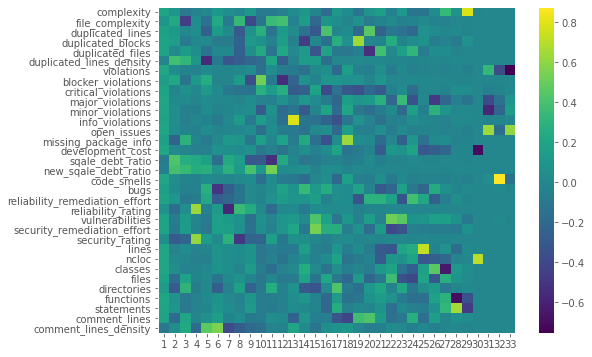

In [ ]:
# Heatmap components
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
components = pca_model.components_
plt.imshow(components.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(sonar_num.columns)), sonar_num.columns)
plt.xticks(range(len(sonar_num.columns)), np.arange(pca_model.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
ercentage of variance explained by every component
----------------------------------------------------
[6.95651604e-01 7.70267280e-02 4.93501594e-02 3.25260031e-02
 2.66676315e-02 2.33012612e-02 2.03713611e-02 1.61818145e-02
 1.21368773e-02 9.92288753e-03 8.53149807e-03 6.69791265e-03
 5.81916559e-03 3.90672567e-03 3.55718712e-03 2.70714300e-03
 1.89014388e-03 1.23172613e-03 9.03858592e-04 5.15575786e-04
 4.27657268e-04 2.32508973e-04 1.43518381e-04 1.33893858e-04
 5.61411405e-05 4.80118138e-05 2.98079830e-05 2.23150839e-05
 8.76091914e-06 1.20384824e-07 6.35412912e-33 6.16417866e-33
 6.16417866e-33]


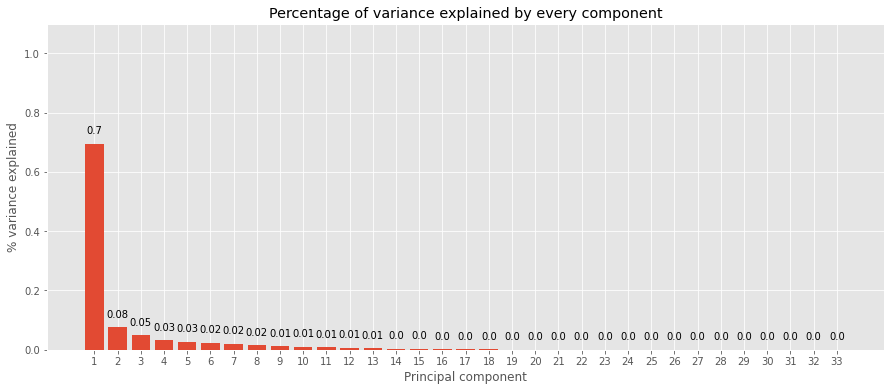

In [ ]:
# ercentage of variance explained by every component
# ==============================================================================
print('----------------------------------------------------')
print('ercentage of variance explained by every component')
print('----------------------------------------------------')
print(pca_model.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
ax.bar(
    x      = np.arange(pca_model.n_components_) + 1,
    height = pca_model.explained_variance_ratio_
)

for x, y in zip(np.arange(len(sonar_num.columns)) + 1, pca_model.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca_model.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Percentage of variance explained by every component')
ax.set_xlabel('Principal component')
ax.set_ylabel('% variance explained');

------------------------------------------
Percentage of accumulated variance explained
------------------------------------------
[0.6956516  0.77267833 0.82202849 0.85455449 0.88122213 0.90452339
 0.92489475 0.94107656 0.95321344 0.96313633 0.97166783 0.97836574
 0.9841849  0.98809163 0.99164882 0.99435596 0.9962461  0.99747783
 0.99838169 0.99889726 0.99932492 0.99955743 0.99970095 0.99983484
 0.99989098 0.999939   0.9999688  0.99999112 0.99999988 1.
 1.         1.         1.        ]


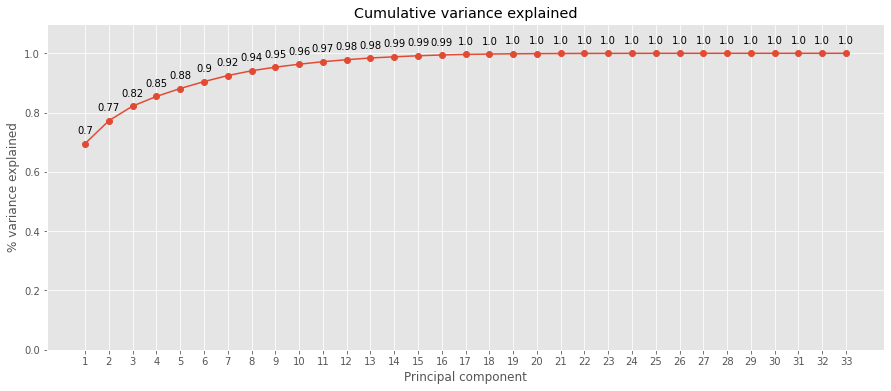

In [ ]:
# Percentage of accumulated variance explained
# ==============================================================================
prop_acum_var = pca_model.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Percentage of accumulated variance explained')
print('------------------------------------------')
print(prop_acum_var)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
ax.plot(
    np.arange(len(sonar_num.columns)) + 1,
    prop_acum_var,
    marker = 'o'
)

for x, y in zip(np.arange(len(sonar_num.columns)) + 1, prop_acum_var):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca_model.n_components_) + 1)
ax.set_title('Cumulative variance explained')
ax.set_xlabel('Principal component')
ax.set_ylabel('% variance explained');

In [ ]:
cols = []
for i in range (33):
  cols.append('PC'+str(i+1))


In [ ]:
# Transformation
# Projection of training observations
# ==============================================================================
projections = pca_pipe.transform(X=sonar_num)
projections = pd.DataFrame(
    projections,
    columns = cols,
    index   = sonar_num.index
)
projections.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33
0,4.094137,-0.804522,-0.132617,0.018899,1.394497,-3.904439,-0.981087,-0.161225,0.527053,0.033736,-0.565309,-0.116800,1.045536,1.474973,-0.395821,0.412285,0.051140,-0.183012,0.118853,-0.253943,-0.133443,-0.044244,-0.087496,-0.018735,0.016372,-0.001721,-0.008952,0.008782,0.004754,-0.000087,-4.741889e-16,2.199361e-16,8.553867e-17
1,4.094331,-0.806106,-0.133986,0.017874,1.393406,-3.904819,-0.982230,-0.161779,0.525448,0.033282,-0.567465,-0.116922,1.045322,1.474721,-0.395731,0.412055,0.051018,-0.182982,0.118790,-0.253984,-0.133446,-0.044260,-0.087493,-0.018714,0.016375,-0.001732,-0.008937,0.008788,0.004752,-0.000087,-4.741889e-16,2.199361e-16,8.553867e-17
2,4.093919,-0.804354,-0.131547,0.019292,1.393801,-3.903598,-0.981096,-0.163935,0.528339,0.034183,-0.566083,-0.114067,1.039334,1.475853,-0.396538,0.415235,0.053966,-0.182630,0.118663,-0.255787,-0.130905,-0.043615,-0.086614,-0.017588,0.016177,-0.001414,-0.008482,0.008563,0.004720,-0.000087,-6.423467e-16,2.198923e-16,8.562458e-17
3,4.093383,-0.805035,-0.131964,0.019027,1.393367,-3.903830,-0.981559,-0.164167,0.527578,0.034380,-0.566824,-0.113913,1.039401,1.475850,-0.396490,0.415177,0.054048,-0.182808,0.118729,-0.255759,-0.130925,-0.043410,-0.086818,-0.017534,0.016245,-0.001203,-0.008469,0.008588,0.004854,-0.000088,-6.105151e-16,3.033544e-16,1.426216e-16
4,4.087799,-0.809711,-0.135214,0.016758,1.391851,-3.904728,-0.984654,-0.164633,0.523044,0.032104,-0.570707,-0.113436,1.033119,1.475751,-0.392764,0.415527,0.056229,-0.180795,0.117282,-0.253397,-0.130790,-0.043820,-0.086864,-0.018561,0.015965,-0.000727,-0.008540,0.008430,0.004742,-0.000087,-6.440197e-16,2.619516e-16,1.589037e-16


In [ ]:
projections = np.dot(pca_model.components_, scale(sonar_num).T)
projections = pd.DataFrame(projections, index = cols)
projections = projections.transpose().set_index(sonar_num.index)
projections.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33
0,4.094137,-0.804522,-0.132617,0.018899,1.394497,-3.904439,-0.981087,-0.161225,0.527053,0.033736,-0.565309,-0.116800,1.045536,1.474973,-0.395821,0.412285,0.051140,-0.183012,0.118853,-0.253943,-0.133443,-0.044244,-0.087496,-0.018735,0.016372,-0.001721,-0.008952,0.008782,0.004754,-0.000087,-4.716154e-16,2.749334e-16,7.694472e-17
1,4.094331,-0.806106,-0.133986,0.017874,1.393406,-3.904819,-0.982230,-0.161779,0.525448,0.033282,-0.567465,-0.116922,1.045322,1.474721,-0.395731,0.412055,0.051018,-0.182982,0.118790,-0.253984,-0.133446,-0.044260,-0.087493,-0.018714,0.016375,-0.001732,-0.008937,0.008788,0.004752,-0.000087,-4.716154e-16,2.749334e-16,7.694472e-17
2,4.093919,-0.804354,-0.131547,0.019292,1.393801,-3.903598,-0.981096,-0.163935,0.528339,0.034183,-0.566083,-0.114067,1.039334,1.475853,-0.396538,0.415235,0.053966,-0.182630,0.118663,-0.255787,-0.130905,-0.043615,-0.086614,-0.017588,0.016177,-0.001414,-0.008482,0.008563,0.004720,-0.000087,-6.397733e-16,2.610118e-16,7.876535e-17
3,4.093383,-0.805035,-0.131964,0.019027,1.393367,-3.903830,-0.981559,-0.164167,0.527578,0.034380,-0.566824,-0.113913,1.039401,1.475850,-0.396490,0.415177,0.054048,-0.182808,0.118729,-0.255759,-0.130925,-0.043410,-0.086818,-0.017534,0.016245,-0.001203,-0.008469,0.008588,0.004854,-0.000088,-5.524305e-16,3.583516e-16,1.340277e-16
4,4.087799,-0.809711,-0.135214,0.016758,1.391851,-3.904728,-0.984654,-0.164633,0.523044,0.032104,-0.570707,-0.113436,1.033119,1.475751,-0.392764,0.415527,0.056229,-0.180795,0.117282,-0.253397,-0.130790,-0.043820,-0.086864,-0.018561,0.015965,-0.000727,-0.008540,0.008430,0.004742,-0.000087,-5.859351e-16,3.169488e-16,1.520445e-16


In [ ]:
# Reconstruction of the projections
# ==============================================================================
reconstruction = pca_pipe.inverse_transform(X=projections)
reconstruction = pd.DataFrame(
                    reconstruction,
                    columns = sonar_num.columns,
                    index   = sonar_num.index
)
print('------------------')
print('Original values')
print('------------------')
display(reconstruction.head())

print('---------------------')
print('Reconstructed values')
print('---------------------')
display(sonar_num.head())

------------------
Original values
------------------


,complexity,file_complexity,duplicated_lines,duplicated_blocks,duplicated_files,duplicated_lines_density,violations,blocker_violations,critical_violations,major_violations,minor_violations,info_violations,open_issues,missing_package_info,development_cost,sqale_debt_ratio,new_sqale_debt_ratio,code_smells,bugs,reliability_remediation_effort,reliability_rating,vulnerabilities,security_remediation_effort,security_rating,lines,ncloc,classes,files,directories,functions,statements,comment_lines,comment_lines_density
0,30703.0,11.5,19476.0,1565.0,408.0,5.6,16006.0,103.0,560.0,7432.0,7314.0,597.0,16006.0,204.0,6207000.0,3.6,2.401406,14277.0,1606.0,14092.0,5.0,123.0,1995.0,4.0,347513.0,206900.0,2793.0,2899.0,475.0,16830.0,77095.0,25329.0,10.9
1,30703.0,11.5,19476.0,1565.0,408.0,5.6,16006.0,103.0,560.0,7432.0,7314.0,597.0,16006.0,204.0,6207000.0,3.6,2.396168,14277.0,1606.0,14092.0,5.0,123.0,1995.0,4.0,347513.0,206900.0,2793.0,2899.0,475.0,16830.0,77095.0,25329.0,10.9
2,30703.0,11.5,19516.0,1567.0,409.0,5.6,16004.0,103.0,560.0,7431.0,7315.0,595.0,16004.0,204.0,6207330.0,3.6,2.401742,14275.0,1606.0,14092.0,5.0,123.0,1995.0,4.0,347522.0,206911.0,2793.0,2899.0,475.0,16830.0,77101.0,25329.0,10.9
3,30699.0,11.5,19516.0,1567.0,409.0,5.6,16000.0,103.0,560.0,7429.0,7313.0,595.0,16000.0,204.0,6206280.0,3.6,2.399874,14271.0,1606.0,14092.0,5.0,123.0,1995.0,4.0,347471.0,206876.0,2793.0,2899.0,475.0,16828.0,77085.0,25329.0,10.9
4,30670.0,11.5,19462.0,1564.0,408.0,5.6,15991.0,103.0,560.0,7426.0,7309.0,593.0,15991.0,204.0,6200220.0,3.6,2.387834,14262.0,1606.0,14092.0,5.0,123.0,1995.0,4.0,347152.0,206674.0,2791.0,2897.0,475.0,16815.0,76996.0,25316.0,10.9


---------------------
Reconstructed values
---------------------


,complexity,file_complexity,duplicated_lines,duplicated_blocks,duplicated_files,duplicated_lines_density,violations,blocker_violations,critical_violations,major_violations,minor_violations,info_violations,open_issues,missing_package_info,development_cost,sqale_debt_ratio,new_sqale_debt_ratio,code_smells,bugs,reliability_remediation_effort,reliability_rating,vulnerabilities,security_remediation_effort,security_rating,lines,ncloc,classes,files,directories,functions,statements,comment_lines,comment_lines_density
0,30703.0,11.5,19476,1565,408,5.6,16006,103,560,7432,7314,597,16006,204,6207000,3.6,2.401406,14277,1606,14092,5,123,1995,4,347513.0,206900.0,2793.0,2899.0,475.0,16830.0,77095.0,25329.0,10.9
1,30703.0,11.5,19476,1565,408,5.6,16006,103,560,7432,7314,597,16006,204,6207000,3.6,2.396168,14277,1606,14092,5,123,1995,4,347513.0,206900.0,2793.0,2899.0,475.0,16830.0,77095.0,25329.0,10.9
2,30703.0,11.5,19516,1567,409,5.6,16004,103,560,7431,7315,595,16004,204,6207330,3.6,2.401742,14275,1606,14092,5,123,1995,4,347522.0,206911.0,2793.0,2899.0,475.0,16830.0,77101.0,25329.0,10.9
3,30699.0,11.5,19516,1567,409,5.6,16000,103,560,7429,7313,595,16000,204,6206280,3.6,2.399874,14271,1606,14092,5,123,1995,4,347471.0,206876.0,2793.0,2899.0,475.0,16828.0,77085.0,25329.0,10.9
4,30670.0,11.5,19462,1564,408,5.6,15991,103,560,7426,7309,593,15991,204,6200220,3.6,2.387834,14262,1606,14092,5,123,1995,4,347152.0,206674.0,2791.0,2897.0,475.0,16815.0,76996.0,25316.0,10.9


In [ ]:
##Principal components regression


In [ ]:
sonar_num.head()

,complexity,file_complexity,duplicated_lines,duplicated_blocks,duplicated_files,duplicated_lines_density,violations,blocker_violations,critical_violations,major_violations,minor_violations,info_violations,open_issues,missing_package_info,development_cost,sqale_debt_ratio,new_sqale_debt_ratio,code_smells,bugs,reliability_remediation_effort,reliability_rating,vulnerabilities,security_remediation_effort,security_rating,lines,ncloc,classes,files,directories,functions,statements,comment_lines,comment_lines_density
0,30703.0,11.5,19476,1565,408,5.6,16006,103,560,7432,7314,597,16006,204,6207000,3.6,2.401406,14277,1606,14092,5,123,1995,4,347513.0,206900.0,2793.0,2899.0,475.0,16830.0,77095.0,25329.0,10.9
1,30703.0,11.5,19476,1565,408,5.6,16006,103,560,7432,7314,597,16006,204,6207000,3.6,2.396168,14277,1606,14092,5,123,1995,4,347513.0,206900.0,2793.0,2899.0,475.0,16830.0,77095.0,25329.0,10.9
2,30703.0,11.5,19516,1567,409,5.6,16004,103,560,7431,7315,595,16004,204,6207330,3.6,2.401742,14275,1606,14092,5,123,1995,4,347522.0,206911.0,2793.0,2899.0,475.0,16830.0,77101.0,25329.0,10.9
3,30699.0,11.5,19516,1567,409,5.6,16000,103,560,7429,7313,595,16000,204,6206280,3.6,2.399874,14271,1606,14092,5,123,1995,4,347471.0,206876.0,2793.0,2899.0,475.0,16828.0,77085.0,25329.0,10.9
4,30670.0,11.5,19462,1564,408,5.6,15991,103,560,7426,7309,593,15991,204,6200220,3.6,2.387834,14262,1606,14092,5,123,1995,4,347152.0,206674.0,2791.0,2897.0,475.0,16815.0,76996.0,25316.0,10.9


In [ ]:
#code_smells
sonar_num.columns.get_loc("code_smells")


17

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import multiprocessing

import warnings
warnings.filterwarnings('ignore')



In [ ]:
# Correlation between numerical columns
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Transform pd correlation matrix in tidy format
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = sonar_num.select_dtypes(include=['float64', 'int']) \
              .corr(method='pearson')
display(tidy_corr_matrix(corr_matrix).head(5))

,variable_1,variable_2,r,abs_r
210,violations,open_issues,1.000000,1.000000
402,open_issues,violations,1.000000,1.000000
487,development_cost,ncloc,0.999996,0.999996
839,ncloc,development_cost,0.999996,0.999996
413,open_issues,code_smells,0.999852,0.999852


In [ ]:
# Division of sonar_num in train and test
# ==============================================================================
variable = "new_sqale_debt_ratio"

X = sonar_num.drop(columns=variable)
y = sonar_num[variable]

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# Least squares (LS)
# Creation and training of the model
# ==============================================================================
modelo = LinearRegression(normalize=True)
modelo.fit(X = X_train, y = y_train)
LinearRegression(normalize=True)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:

# Predictions test
# ==============================================================================
predictions = modelo.predict(X=X_test)
predictions = predictions.flatten()

In [ ]:

# Test error of the model
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predictions,
            squared = False
           )
print("")
print(f"Test error (rmse): {rmse_ols}")





Test error (rmse): 1.0898476277006846


In [ ]:
# PCR
# Training of the regression model with data with PCA + scaling
# ==============================================================================
pipe_model = make_pipeline(StandardScaler(), PCA(), LinearRegression())
pipe_model.fit(X=X_train, y=y_train)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
pipe_model.set_params


<bound method Pipeline.set_params of Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)>

In [ ]:
# Predictions test
# ==============================================================================
predictions = pipe_model.predict(X=X_test)
predictions = predictions.flatten()

# Test error of the model 
# ==============================================================================
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predictions,
            squared = False
           )
print("")
print(f"Test error (rmse): {rmse_pcr}")



Test error (rmse): 1.0898450930986465


In [ ]:
# Hyperparameter grid
# ==============================================================================
param_grid = {'pca__n_components': [1, 2, 3, 4,5, 6,7, 8,9, 10, 15, 20, 30, 50]}

# Grid search with cross validation
# ==============================================================================
grid = GridSearchCV(
        estimator  = pipe_model,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = KFold(n_splits=5, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# results
# ==============================================================================
results = pd.DataFrame(grid.cv_results_)
results.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(3)


,param_pca__n_components,mean_test_score,std_test_score,mean_train_score,std_train_score
12,30,-0.808123,0.147493,-0.819505,0.041346
11,20,-0.815786,0.145789,-0.826947,0.040805
10,15,-0.821239,0.144892,-0.832319,0.040487


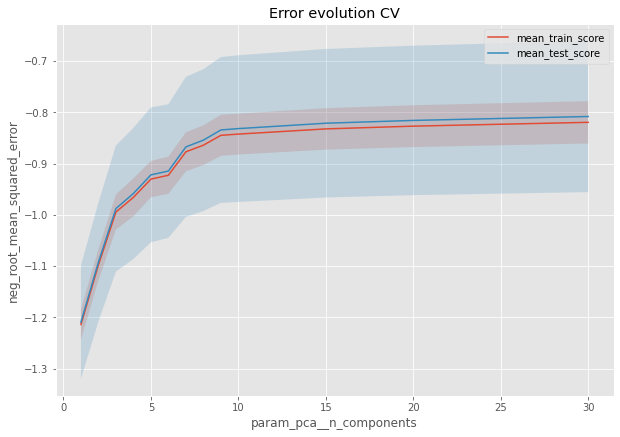

In [ ]:
# Plot cross-validation results for each hyperparameter
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6.84), sharey=True)

results.plot('param_pca__n_components', 'mean_train_score', ax=ax)
results.plot('param_pca__n_components', 'mean_test_score', ax=ax)
ax.fill_between(results.param_pca__n_components.astype(np.float),
                results['mean_train_score'] + results['std_train_score'],
                results['mean_train_score'] - results['std_train_score'],
                alpha=0.2)
ax.fill_between(results.param_pca__n_components.astype(np.float),
                results['mean_test_score'] + results['std_test_score'],
                results['mean_test_score'] - results['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Error evolution CV')
ax.set_ylabel('neg_root_mean_squared_error');


In [ ]:
# Best hyperparameters (CV)
# ==============================================================================
print("----------------------------------------")
print("Best hyperparameters (CV)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Best hyperparameters (CV)
----------------------------------------
{'pca__n_components': 30} : -0.8081227137903939 neg_root_mean_squared_error


In [ ]:
# Training of the regression model with data with PCA + scaling
# ==============================================================================
pipe_model = make_pipeline(StandardScaler(), PCA(n_components=5), LinearRegression())
pipe_model.fit(X=X_train, y=y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
# Test predictions
# ==============================================================================
predictions = pipe_model.predict(X=X_test)
predictions = predictions.flatten()

# Error test of the model
# ==============================================================================
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predictions,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")




El error (rmse) de test es: 1.1781949170256731
